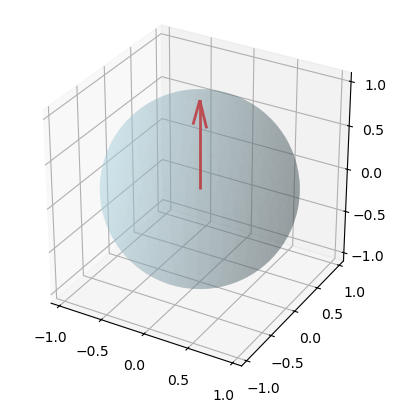

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Charger les données de simulation (assure-toi que ces arrays sont disponibles)
time = np.loadtxt("data.csv", delimiter=",", skiprows=1, usecols=0)  # Colonne du temps
theta = np.loadtxt("data.csv", delimiter=",", skiprows=1, usecols=1)  # Colonne theta
phi = np.loadtxt("data.csv", delimiter=",", skiprows=1, usecols=2)  # Colonne phi

n_frames = len(time)  # Nombre de pas de temps

# Conversion sphériques -> cartésiennes
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Préparation de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])
ax.set_box_aspect([1, 1, 1])

# Ajout d'une sphère pour guider l'animation
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.3)

# Initialisation de la flèche (vecteur)
arrow = ax.quiver(0, 0, 0, x[0], y[0], z[0], color='red', linewidth=2)

# Fonction de mise à jour de l'animation
def update(frame):
    arrow.set_segments([[[0, 0, 0], [x[frame], y[frame], z[frame]]]])
    return arrow,

# Création de l'animation
anim = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)

# Affichage
plt.show()

# Sauvegarde de l'animation
anim.save("precession_arrow.gif", writer="ffmpeg", fps=60)

In [ ]:
import pandas as pd

data = pd.read_csv("data.csv")

data.head()

temps , theta , phi = data.Time , data.theta , data.phi